In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as PathEffects
from PIL import Image, ImageDraw, ImageOps
%matplotlib inline
import seaborn as sns
import random
import os
import gc

from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

import os
import cv2
from PIL import Image
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from sklearn import metrics

In [ ]:
od.download('https://www.kaggle.com/datasets/cihan063/autism-image-data',force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hananabhan
Your Kaggle Key: ··········


100%|██████████| 229M/229M [00:01<00:00, 176MB/s]


# Train & Test Directories

In [ ]:
train_data = "/content/autism-image-data/AutismDataset/train"
test_data = "/content/autism-image-data/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [ ]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in ("/content/autism-image-data/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/content/autism-image-data/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("/content/autism-image-data/AutismDataset/train/{}".format(i)))


test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in ("/content/autism-image-data/AutismDataset/test/{}".format(i)):
        test_non_autistic.append(("/content/autism-image-data/AutismDataset/test/{}".format(i)))
    else:
        test_autistic.append(("/content/autism-image-data/AutismDataset/test/{}".format(i)))

In [ ]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

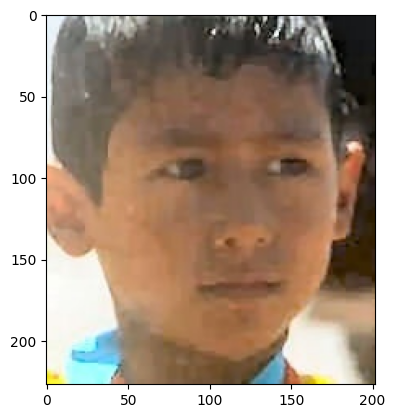

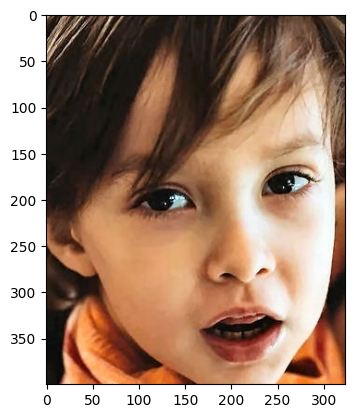

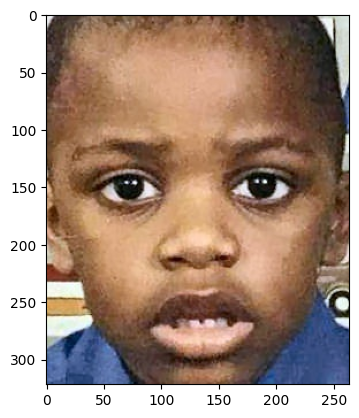

In [ ]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [ ]:
def read_and_process_image(list_of_images):
    X = []
    y = []

    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (150, 150), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)

    return X,y

X_train, y_train = read_and_process_image(train_imgs)


# Validation Data

In [ ]:
val_autistic = "/content/autism-image-data/AutismDataset/valid/Autistic"
val_non_autistic = "/content/autism-image-data/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/content/autism-image-data/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/content/autism-image-data/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

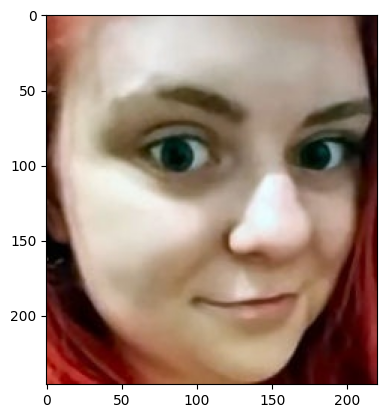

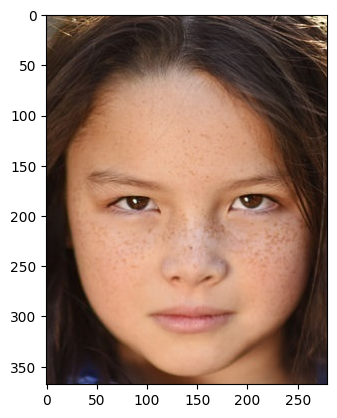

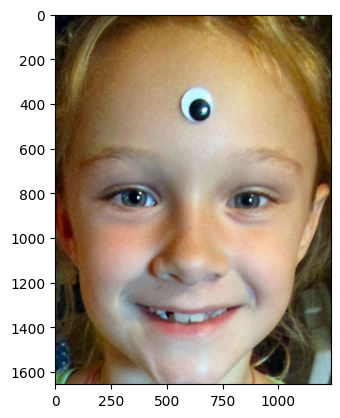

In [ ]:
import matplotlib.image as mpimg
for ima in val_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [ ]:
X_val, y_val = read_and_process_image(val_imgs)

# Test Data

# Converting Train & Val Data To np Array


In [ ]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val

array([[[[ 47,  63, 146],
         [ 57,  73, 156],
         [ 60,  76, 159],
         ...,
         [ 11,  10,  30],
         [ 14,  14,  37],
         [ 15,  15,  45]],

        [[ 55,  70, 156],
         [ 59,  74, 160],
         [ 57,  72, 158],
         ...,
         [ 10,   9,  29],
         [ 12,  13,  36],
         [ 14,  14,  44]],

        [[ 52,  69, 155],
         [ 52,  68, 155],
         [ 51,  67, 153],
         ...,
         [ 11,   9,  29],
         [ 13,  13,  36],
         [ 14,  14,  44]],

        ...,

        [[ 57,  68, 202],
         [ 61,  73, 205],
         [ 60,  72, 204],
         ...,
         [ 19,  14,  92],
         [ 28,  24, 110],
         [ 35,  30, 120]],

        [[ 55,  66, 200],
         [ 52,  63, 196],
         [ 50,  62, 194],
         ...,
         [ 12,   7,  84],
         [ 23,  19, 105],
         [ 30,  26, 116]],

        [[ 58,  69, 203],
         [ 46,  57, 190],
         [ 37,  50, 181],
         ...,
         [  5,   1,  78],
        

# Shape Of Data

In [ ]:
print("Shape of Train images:", X_train.shape)
print("Shape of Train labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of Train images: (2540, 150, 150, 3)
Shape of Train labels: (2540,)
Shape of validation images: (100, 150, 150, 3)
Shape of validation labels: (100,)


# VGG 16

In [ ]:
vgg_16 = VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


# Freeze Layers

In [ ]:
for layer in vgg_16.layers:
   layer.trainable = False

In [ ]:
vgg_16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Custom Model

In [ ]:
model = Sequential()
model.add(vgg_16)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


# Compile Model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer="Adam", metrics = ['acc'])

# Generating Larger DataSet

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = 32)
val_generator = val_datagen.flow(X_val, y_val, batch_size = 32)

# Train Model

In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              validation_data=val_generator,
                              workers=4,
                              use_multiprocessing=False
                             )

Epoch 1/30
80/80 [==============================] - 28s 180ms/step - loss: 0.7156 - acc: 0.6524 - val_loss: 0.5317 - val_acc: 0.7200
Epoch 2/30
80/80 [==============================] - 18s 222ms/step - loss: 0.5482 - acc: 0.7189 - val_loss: 0.5869 - val_acc: 0.6700
Epoch 3/30
80/80 [==============================] - 19s 234ms/step - loss: 0.5523 - acc: 0.7087 - val_loss: 0.5190 - val_acc: 0.7000
Epoch 4/30
80/80 [==============================] - 13s 155ms/step - loss: 0.5308 - acc: 0.7350 - val_loss: 0.5250 - val_acc: 0.7400
Epoch 5/30
80/80 [==============================] - 20s 238ms/step - loss: 0.5326 - acc: 0.7339 - val_loss: 0.5320 - val_acc: 0.7500
Epoch 6/30
80/80 [==============================] - 18s 222ms/step - loss: 0.5207 - acc: 0.7315 - val_loss: 0.4954 - val_acc: 0.7400
Epoch 7/30
80/80 [==============================] - 19s 235ms/step - loss: 0.5175 - acc: 0.7374 - val_loss: 0.5128 - val_acc: 0.7300
Epoch 8/30
80/80 [==============================] - 18s 220ms/step - 

# Plotting Accuracy

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,acc,val_loss,val_acc
0,0.715594,0.652362,0.531724,0.72
1,0.548195,0.718898,0.586871,0.67
2,0.552323,0.708661,0.518959,0.70
3,0.530804,0.735039,0.524972,0.74
4,0.532633,0.733858,0.532034,0.75
5,0.520685,0.731496,0.495413,0.74
6,0.517505,0.737402,0.512845,0.73
7,0.500731,0.746063,0.507034,0.76
8,0.504188,0.748031,0.512636,0.76
9,0.519668,0.735039,0.535389,0.70


# Training & Val Acc

Text(0.5, 1.0, 'Training and Validation Accuracy')

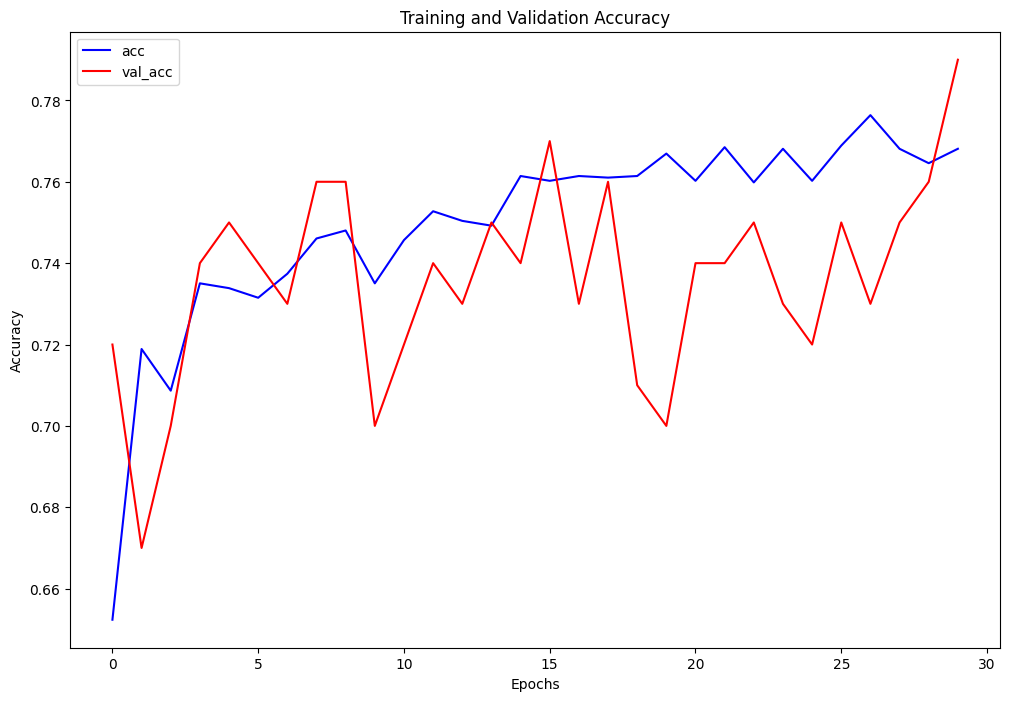

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["acc", "val_acc"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

# Training And Val Loss

Text(0.5, 1.0, 'Training and Validation Loss')

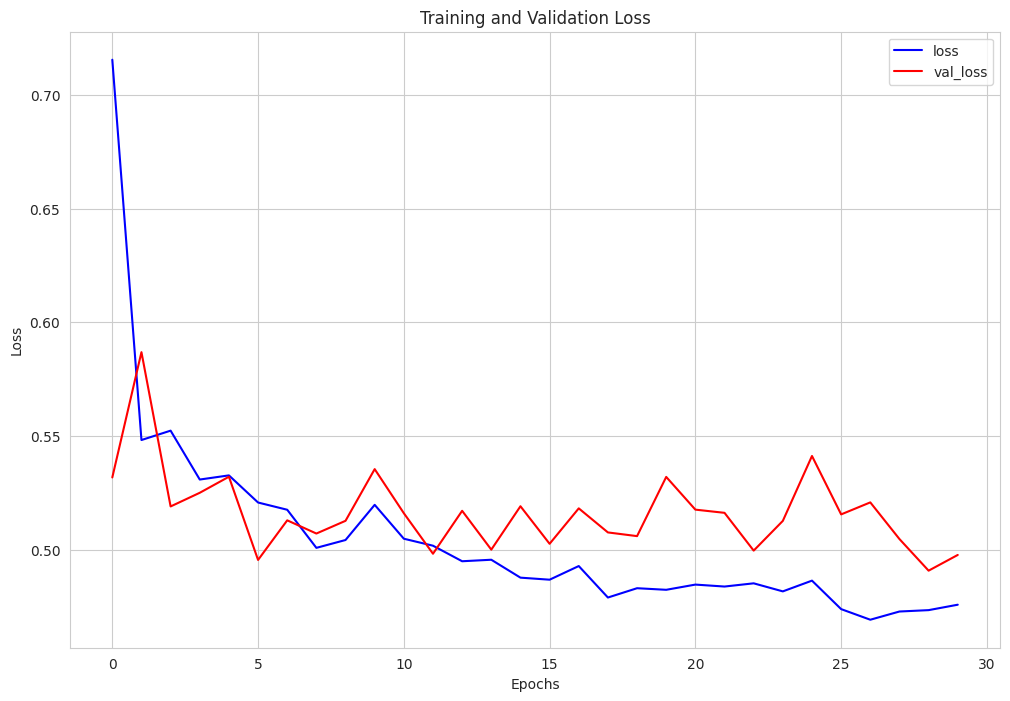

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

# Test Data

In [ ]:
test_autistic = "/content/autism-image-data/AutismDataset/consolidated/Autistic"
test_non_autistic = "/content/autism-image-data/AutismDataset/consolidated/Non_Autistic"
test_autistic_imgs = ["/content/autism-image-data/AutismDataset/consolidated/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
test_non_autistic_imgs = ["/content/autism-image-data/AutismDataset/consolidated/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
test_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

# Prediction

In [ ]:
pred = model.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)

4/4 [==============================] - 0s 59ms/step


In [ ]:
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

,filename,test_labels,predictions
0,06.jpg,1,0
1,02.jpg,1,1
2,18.jpg,1,1
3,43.jpg,1,1
4,23.jpg,1,0
...,...,...,...
95,26.jpg,0,0
96,40.jpg,0,0
97,16.jpg,0,0
98,01.jpg,0,0


In [ ]:
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

Model Accuracy: 71.00%


In [ ]:
!pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 919.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62118 sha256=557558e5e0c4fd75ce20b4438476de8360cfa025a9421f8a1d5abeb1d8581938
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt
